In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')



In [3]:
data= pd.read_csv("netflix1.csv")

In [4]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Cleaning

In [8]:
data.isnull()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8785,False,False,False,False,False,False,False,False,False,False
8786,False,False,False,False,False,False,False,False,False,False
8787,False,False,False,False,False,False,False,False,False,False
8788,False,False,False,False,False,False,False,False,False,False


In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data['date_added']=pd.to_datetime(data['date_added'])

In [11]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

## Content Type Distribution

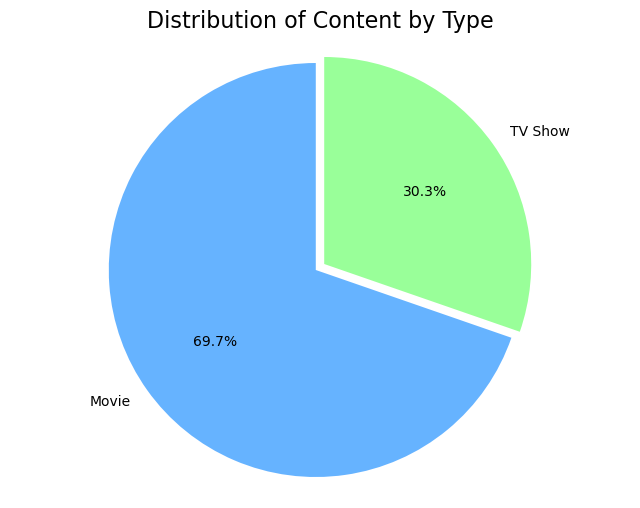

In [13]:

type_counts = data['type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(type_counts.values,  
        labels=type_counts.index,  
        autopct='%1.1f%%',  
        startangle=90,  
        colors=['#66b3ff', '#99ff99'], 
        explode=(0.05, 0))  

plt.title('Distribution of Content by Type', fontsize=16)
plt.axis('equal')
plt.show()


## Most Common Genres

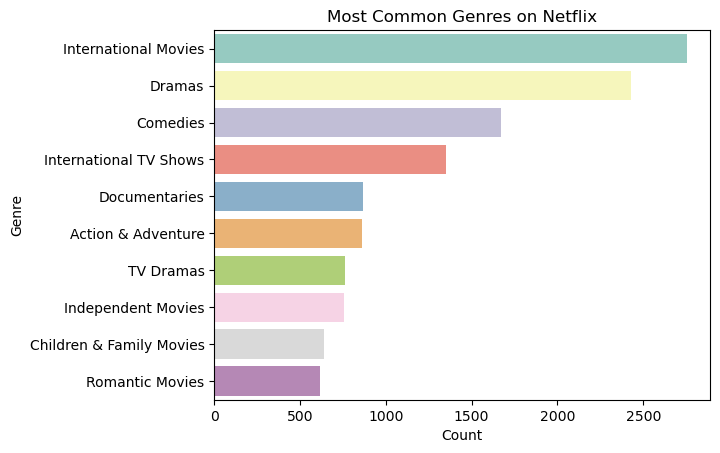

In [15]:
genres = data['listed_in'].str.cat(sep=', ').split(', ')
genre_counts = pd.Series(genres).value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


## Top 10 Directors with the Most Titles

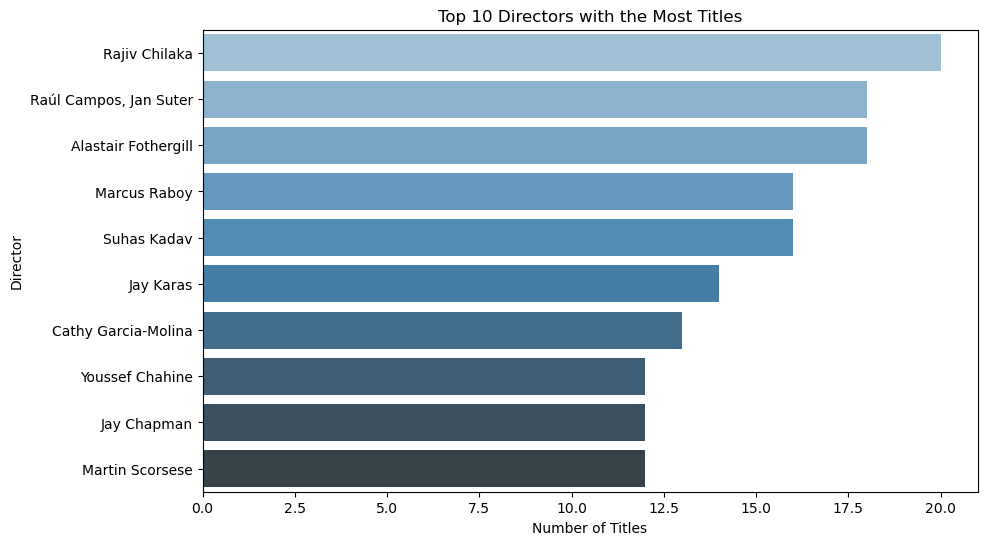

In [17]:
# Filter out rows where the director is 'Not Given'
filtered_data = data[data['director'] != 'Not Given']

# Get top directors
top_directors = filtered_data['director'].value_counts().head(10)

# Plot top directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')

# Add data labels
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')

plt.show()

## Number of Releases Over the Years

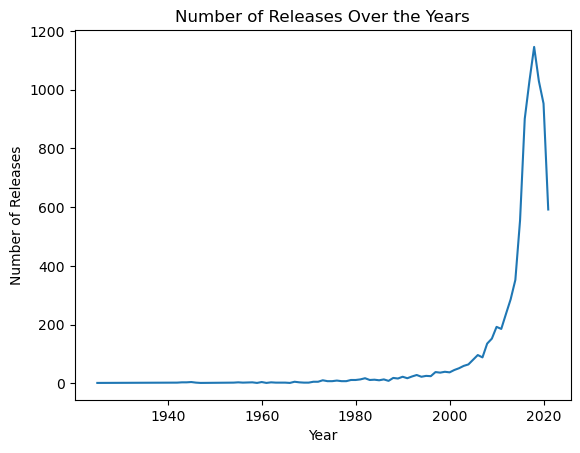

In [19]:
# Trend of releases over the years
release_trend = data['release_year'].value_counts().sort_index()
release_trend.plot(kind='line')
plt.title('Number of Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

## Top 10 Countries by Number of Titles on Netflix

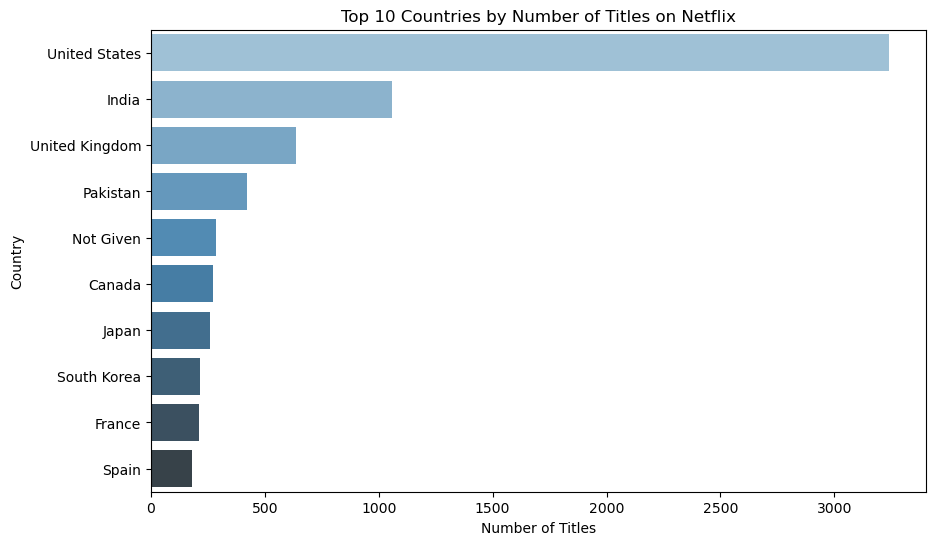

In [21]:
# Count the number of titles per country
country_count=data['country'].value_counts().head(10)

# Plot the top 10 countries by the number of titles
plt.figure(figsize=(10,6))
sns.barplot(x=country_count.values, y=country_count.index, palette='Blues_d')

#add lables 
plt.title('Top 10 Countries by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

plt.show()

## Distribution of Content Ratings on Netflix

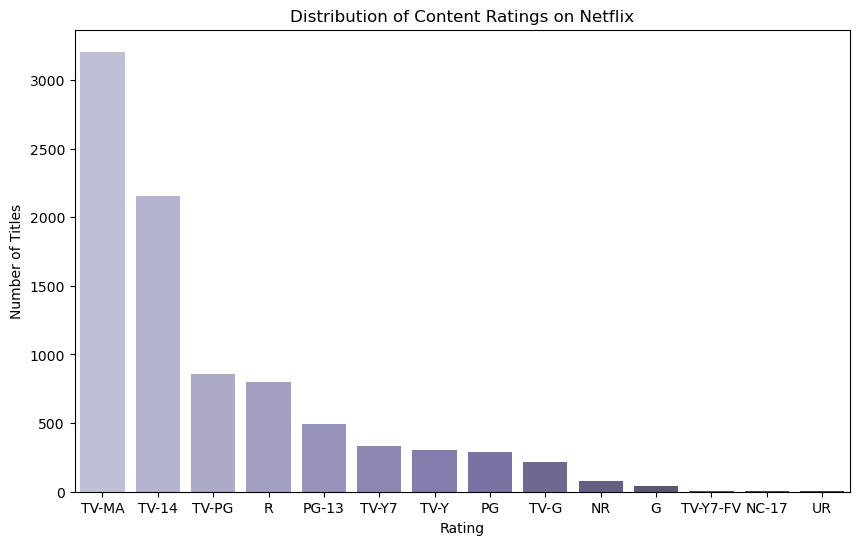

In [23]:

# Count the occurrences of each rating
rating_count = data['rating'].value_counts()

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_count.index, y=rating_count.values, palette='Purples_d')

# Add labels and title
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')

plt.show()

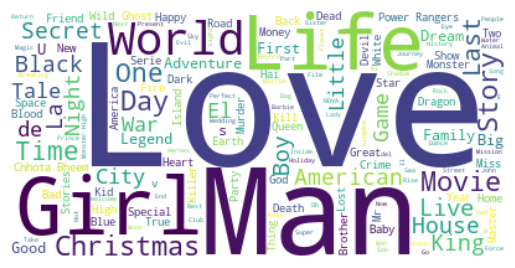

In [24]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate(' '.join(data['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
